In [1]:
import numpy  as np
import matplotlib.pyplot as plt

In [2]:

N_states = 100  
States = list(range(0,N_states+1)) 
rewards = np.zeros(N_states+1)  
rewards[100] = 1.0  
Policy = [0] * 101 
Max_N_actions = 51
alpha = 0.6
gamma=1


In [3]:
def eps_greedy(a, eps, state):
    p = np.random.random()
    posible_actions = [i for i in range( min(state + 1, 101 - state))]
    if p < (1 - eps):
        return a
    else:
        return np.random.choice(posible_actions)

In [4]:
def SARSA(p_head):
  Q_Sarsa = np.zeros([N_states+ 1, Max_N_actions])
  G = 0
  episodes = 1000
  rewardTracker = []
  eps=0.3

  for state_init in reversed(States[1:100]): 
      print("-----------------------------")
      print("Number of the current State: ", state_init)
      for episode in range(1,episodes+1):
          Terminal = False
          G, reward = 0,0
          state = state_init
          iteration=1
          while Terminal != True:
              List_of_posible_actions = [i for i in range(1, min(state + 1, 101 - state))]  
              action = np.argmax(Q_Sarsa[state]) 
              if action == 0 and state != 0: 
                  action = np.random.choice(List_of_posible_actions)
              action = eps_greedy(action, eps, state)

              iteration+=1
              Coin_toss_outcome = np.random.random() 
              if Coin_toss_outcome <= Head_probability: 
                  state2 = state + action 
              else: 
                  state2 = state - action 

              reward = rewards[state2]
              if (state2 == 100) or (state2 == 0):
                  Terminal = True
              Q_Sarsa[state,action] += alpha * ((reward + gamma*((np.max(Q_Sarsa[state2]))  - Q_Sarsa[state,action])))
              # print("episode: ",episode ,"---iteration: ", iteration, "---state:", state,"---action:", action, "---Q function: ", Q_Sarsa[state, action])
              G += reward
              state = state2  
          rewardTracker.append(G)

          if episode % 1000 == 0:
              print('Episode {} Reward: {}   Total Average Reward: {} '.format(episode,G, sum(rewardTracker)/len(rewardTracker)))


  value_function = []
  policy = []
  for state in States[1:100]: 
      value_function.append(np.max(Q_Sarsa[state]))
      policy.append(np.argmax(Q_Sarsa[state]))
      
  plt.plot(value_function)
  plt.show()

  plt.plot(policy)
  plt.show()

-----------------------------
Number of the current State:  99
Episode 1000 Reward: 1.0   Total Average Reward: 0.639 
-----------------------------
Number of the current State:  98
Episode 1000 Reward: 1.0   Total Average Reward: 0.5715 
-----------------------------
Number of the current State:  97
Episode 1000 Reward: 1.0   Total Average Reward: 0.526 
-----------------------------
Number of the current State:  96
Episode 1000 Reward: 0.0   Total Average Reward: 0.489 
-----------------------------
Number of the current State:  95
Episode 1000 Reward: 0.0   Total Average Reward: 0.4518 
-----------------------------
Number of the current State:  94
Episode 1000 Reward: 0.0   Total Average Reward: 0.42866666666666664 
-----------------------------
Number of the current State:  93
Episode 1000 Reward: 1.0   Total Average Reward: 0.4094285714285714 
-----------------------------
Number of the current State:  92
Episode 1000 Reward: 1.0   Total Average Reward: 0.392 
-------------------

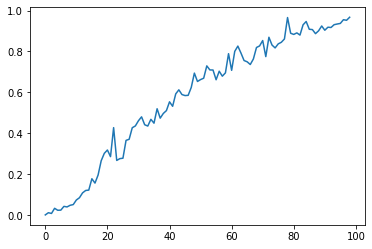

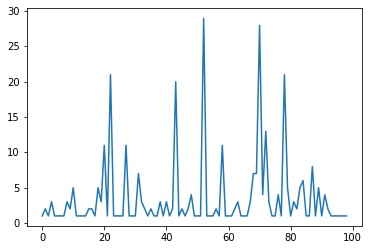

In [5]:
Head_probability = 0.25
SARSA(Head_probability)

-----------------------------
Number of the current State:  99
Episode 1000 Reward: 1.0   Total Average Reward: 0.997 
-----------------------------
Number of the current State:  98
Episode 1000 Reward: 1.0   Total Average Reward: 0.995 
-----------------------------
Number of the current State:  97
Episode 1000 Reward: 1.0   Total Average Reward: 0.9913333333333333 
-----------------------------
Number of the current State:  96
Episode 1000 Reward: 1.0   Total Average Reward: 0.991 
-----------------------------
Number of the current State:  95
Episode 1000 Reward: 1.0   Total Average Reward: 0.9892 
-----------------------------
Number of the current State:  94
Episode 1000 Reward: 1.0   Total Average Reward: 0.9865 
-----------------------------
Number of the current State:  93
Episode 1000 Reward: 1.0   Total Average Reward: 0.9842857142857143 
-----------------------------
Number of the current State:  92
Episode 1000 Reward: 1.0   Total Average Reward: 0.98275 
------------------

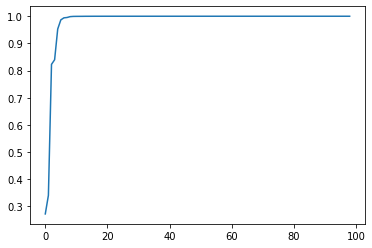

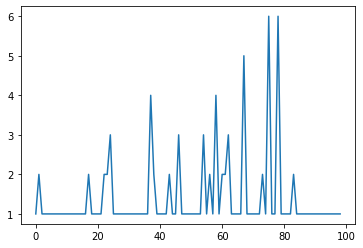

In [6]:
Head_probability = 0.55
SARSA(Head_probability)